In [1]:
import tensorflow

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1).T
X_test = X_test.reshape(X_test.shape[0], -1).T

ytr = y_train.shape[0]
yts = y_test.shape[0]

Y_train = np.zeros((10, ytr))
Y_test = np.zeros((10, yts))

for i in range(ytr):
    Y_train[y_train[i], i]=1
for i in range(yts):
    Y_test[y_test[i], i]=1

X_train = X_train/255
X_test = X_test/255

In [5]:
def initialize(layer_dim):
    dicti = {}
    l = len(layer_dim)
    for i in range(1, l):
        dicti['W'+str(i)] = np.random.randn(layer_dim[i], layer_dim[i-1])*0.01
        dicti['B'+str(i)] = np.zeros((layer_dim[i], 1))
    return dicti

In [6]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

In [7]:
def relu(x):
    z = np.maximum(0, x)
    return z

In [8]:
def forward(X, param):
    l = len(param)//2
    answer = {}
    A=X
    for i in range(1, l):
        answer['Z'+str(i)]=np.dot(param['W'+str(i)], A)+param['B'+str(i)]
        answer['A'+str(i)]=relu(answer['Z'+str(i)])
        A = answer['A'+str(i)]
    answer['Z'+str(l)]=np.dot(param['W'+str(l)], A)+param['B'+str(l)]
    answer['A'+str(l)]=softmax(answer['Z'+str(l)])
    answer['A'+str(0)]=X
    return answer

In [9]:
def softmax(x):
    y = np.exp(x)/np.sum(np.exp(x), axis=0)
    return y

In [10]:
def compute_cost(y, AL):
    cost = ((np.sum(-y*np.log(AL)))/y.shape[1])
    return cost

In [11]:
def back_propag(param, answer):
    grad = {}
    l = len(param)//2
    m=Y_train.shape[1]
    grad['dZ'+str(l)]=answer['A'+str(l)]-Y_train
    for i in reversed(range(l)):
        grad['dW'+str(i+1)]=(np.dot(grad['dZ'+str(i+1)], answer['A'+str(i)].T))/m
        grad['dB'+str(i+1)]=(np.sum(grad['dZ'+str(i+1)], axis=1, keepdims=True))/m
        if(i==0):
            break
        grad['dA'+str(i)]=np.dot(param['W'+str(i+1)].T, grad['dZ'+str(i+1)])
        grad['dZ'+str(i)]=grad['dA'+str(i)]*relu_der(answer['Z'+str(i)])
    return grad

In [12]:
def relu_der(X):
    X=1*(X>0)
    return X

In [13]:
def update_par(param, grad, alpha):
    l = len(param)//2
    for i in range(1, l+1):
        param['W'+str(i)]=param['W'+str(i)]-alpha*grad['dW'+str(i)]
        param['B'+str(i)]=param['B'+str(i)]-alpha*grad['dB'+str(i)]
    return param

In [20]:
def nn_model(X, Y, layers, alpha, iterations):
    parameters = initialize(layers)
    costs = []
    for i in range(iterations):
        answer = forward(X, parameters)
        grad = back_propag(parameters, answer)
        #print(parameters['B2'].shape)
        parameters = update_par(parameters, grad, alpha)
        #print(parameters['B2'].shape)
        cost = compute_cost(Y, answer['A'+str(len(layers)-1)])
        #print("a")
        if i%50 == 0:
            print("Cost after iteration %i: %f" % (i,cost))
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(alpha))
    plt.show()
    return parameters

Cost after iteration 0: 2.302739
Cost after iteration 50: 2.228625
Cost after iteration 100: 1.316362
Cost after iteration 150: 0.766885
Cost after iteration 200: 0.586212
Cost after iteration 250: 0.499514
Cost after iteration 300: 0.448337
Cost after iteration 350: 0.414541
Cost after iteration 400: 0.390464
Cost after iteration 450: 0.372285
Cost after iteration 500: 0.357882
Cost after iteration 550: 0.346034
Cost after iteration 600: 0.336007
Cost after iteration 650: 0.327309
Cost after iteration 700: 0.319616
Cost after iteration 750: 0.312717
Cost after iteration 800: 0.306467
Cost after iteration 850: 0.300732
Cost after iteration 900: 0.295401
Cost after iteration 950: 0.290435


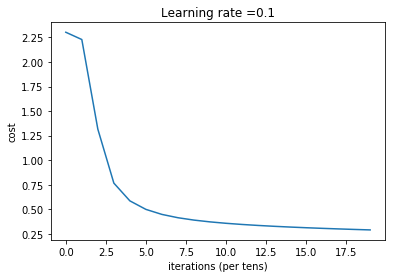

In [21]:
parameters = nn_model(X_train, Y_train,[28*28, 25, 10], 0.1, 1000)

In [22]:
def predict(X, Y):
    cache = forward(X, parameters)
    l = len(parameters)//2
    #use AL and Y to get the accuracy
    AL = cache["A"+str(l)]
    AL = (AL == AL.max(axis=0))*1
    m = AL.shape[1]
    accuracy = (100/m)*np.sum(np.logical_and(AL,Y))
    print(str(accuracy)+"%")

    return accuracy

In [23]:
predict(X_test, Y_test)

92.08%


92.08

In [24]:
predict(X_train, y_train)

90.12833333333334%


90.12833333333334